## Investigating Heat-Activity Hotspots for Strategic Cooling in Melbourne CBD and Surroundings  
**Authored by:** Ratanakmoni Slot

**Duration:** 90 mins  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, Data Analysis, Geospatial Analysis, Clustering, Temporal Analysis, Visualization  

---

### Scenario  

Melbourne experiences rising temperatures, with extreme heat posing significant challenges to **public health, comfort, and safety**. These challenges are particularly pronounced during crowded, high-temperature periods in **Melbourne CBD and its surrounding areas**. This project investigates pedestrian movement patterns and temperature hotspots to identify **heat-activity hotspots**—zones experiencing both extreme heat (>30°C) and significant pedestrian activity.  

The ultimate goal is to inform strategic placement of **cooling interventions** such as shaded seating, hydration stations, misting systems, and urban greening initiatives to enhance livability and mitigate the urban heat island effect.  

---

### What This Use Case Will Teach You  

At the end of this use case, you will:  
- Understand how to clean and preprocess weather and pedestrian movement datasets.  
- Perform **exploratory data analysis (EDA)** to uncover key trends and patterns.  
- Conduct **clustering analysis** to identify heat-activity hotspots.  
- Use geospatial tools to visualize temperature and pedestrian activity patterns interactively.  
- Analyze **temporal trends** to pinpoint critical hours of heat stress and pedestrian density.  
- Compare seasonal and daily variations to guide strategic decision-making.  
- Develop actionable recommendations for cooling interventions.  
- Create a professional, interactive map using **Folium** to highlight critical intervention zones.  

---

### Background and Introduction  

As cities like Melbourne face increasing extreme heat events, urban centers become especially vulnerable due to the **urban heat island effect**. Areas with significant pedestrian activity during extreme heat can experience severe impacts on public health, comfort, and safety.  

By leveraging data-driven techniques such as **spatial and temporal analysis**, clustering, and interactive mapping, we can identify critical hotspots requiring cooling resources. This analysis focuses on Melbourne CBD and its immediate surroundings, pinpointing areas that demand strategic interventions like:  
- Shaded seating zones  
- Hydration stations  
- Misting systems  
- Tree planting initiatives  

The findings will enable city planners to optimize resource allocation, improve public well-being, and ensure sustainable urban development.  

---

### Datasets Used  

1. **Microclimate Sensor Data**  
   - Contains temperature, wind, and other environmental metrics across Melbourne.  
   - Key column: `airtemperature` (>30°C for extreme heat).  

2. **Pedestrian Counts Data**  
   - Hourly pedestrian counts across various sensors in Melbourne.  
   - Key columns: `pedestriancount`, `hourday`, `location`.  

These datasets are sourced from the **City of Melbourne Open Data Portal**.  

---

### Implementation  

**Step 1: Data Cleaning and Preprocessing**  
- Load and inspect both datasets.  
- Handle missing values, filter for relevant columns, and ensure consistency between location formats.  
- Combine temperature data (>30°C) with corresponding pedestrian counts.  

**Step 2: Exploratory Data Analysis (EDA)**  
- Analyze temperature distributions during extreme heat days.  
- Identify peak pedestrian hours and overlay temperature trends.  
- Visualize pedestrian counts by time and location to find high-activity periods.  

**Step 3: Heat-Activity Hotspot Analysis**  
- Apply **K-means clustering** to identify high-risk hotspots: areas with both **high temperatures** and **high pedestrian counts**.  
- Use geospatial analysis tools like **Folium** to map:  
  - Heat hotspots (temperature >30°C).  
  - Pedestrian activity clusters.  
- Visualize combined results to locate critical intervention zones.  

**Step 4: Temporal and Seasonal Trends**  
- Analyze how pedestrian activity and temperature correlate **hourly** and **seasonally**:  
  - Compare heat vs. activity during summer, winter, and transitional seasons.  
  - Identify hours of maximum pedestrian exposure during extreme heat days.  
- Highlight trends that exacerbate heat stress risks.  

**Step 5: Final Strategic Map with Recommendations**  
- Develop an **interactive Folium map** showcasing:  
  - Heat hotspots (30°C+ temperature areas) as a HeatMap.  
  - Pedestrian hotspots as clustered markers with details on pedestrian counts and locations.  
  - Priority intervention points with strategic recommendations.  

**Step 6: Actionable Recommendations**  
- Propose cooling interventions for key zones:  
   1. **Flinders Street & Swanston Street** – shaded seating and hydration stations.  
   2. **Southbank Boulevard** – misting systems and shaded pathways.  
   3. **Brunton Avenue (MCG Area)** – cooling zones and urban greening.  
   4. **Yarra River Promenade** – reflective shaded surfaces and hydration points for riverside pedestrian comfort.  
   5. **Spring Street & Collins Street** – tree planting initiatives and urban shade.  

---

### Conclusion  

This use case provides a comprehensive approach to identifying **heat-activity hotspots** using data-driven techniques such as clustering, spatial analysis, and temporal analysis. By mapping areas with extreme heat (>30°C) and high pedestrian activity, we pinpoint zones that require immediate and long-term interventions.  

The actionable insights and visual outputs will empower city planners to strategically implement cooling resources across **Melbourne CBD and its surroundings**, improving public health, comfort, and sustainability in the face of rising temperatures.  

---

### Key Deliverables:  
1. **Interactive Folium Map**: A map highlighting critical hotspots and recommended intervention points.  
2. **Detailed Insights**: Heat trends, pedestrian patterns, and hotspot analysis.  
3. **Strategic Recommendations**: Tailored solutions for short-term and long-term cooling initiatives.  


### Step 1: Setting Up the Environment

This step ensures all required libraries are installed and imported. These libraries are critical for data preprocessing, geospatial analysis, machine learning tasks, and interactive visualizations:

1. **folium**: Used for creating interactive map visualizations and adding layers like heatmaps and marker clusters.
2. **geopandas**: Facilitates geospatial data manipulation, integrating well with shapefiles and geographic data.
3. **matplotlib** and **seaborn**: Libraries for creating clear and effective data visualizations, including plots and charts.
4. **scikit-learn**: Provides tools for clustering (e.g., K-Means) and predictive modeling using machine learning algorithms.
5. **shapely**: Handles geometric objects such as points, lines, and polygons, crucial for spatial operations.
6. **os.environ**: Optimizes resource usage by limiting threading for computations.
7. **IPython.display**: Enhances visualization within Jupyter Notebooks by rendering interactive outputs.

The environment is now fully set up for data analysis, geospatial visualization, and machine learning tasks. This ensures smooth execution of subsequent steps in the workflow.


In [18]:
# Installing necessary libraries
!pip install folium geopandas

# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import geopandas as gpd
from shapely.geometry import Point
import requests
from io import StringIO

# Setting threading limit for optimization
os.environ['OMP_NUM_THREADS'] = '1'


### Step 2: Data Import Using API

This step imports datasets directly from the City of Melbourne's open data portal using their API. The datasets are critical for understanding pedestrian activity and microclimate conditions.

**Function: `API_Unlimited`**
- The function retrieves data using the dataset identifier.
- It makes an API call to the base URL with parameters specifying:
  - **Format:** CSV
  - **Limit:** -1 (fetch all records)
  - **Language:** English
  - **Timezone:** UTC
- The response is parsed as a Pandas DataFrame for further analysis.
- A sample of 10 random rows is printed to verify the dataset.

**Datasets Loaded:**
1. **Pedestrian Counts Data:** Monthly pedestrian counts by the hour.
2. **Weather Data:** Microclimate sensor readings to assess weather conditions.


In [19]:
def API_Unlimited(datasetname):  # Pass in dataset name and API key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # All records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999))  # Test
        return datasetname
    else:
        return (print(f'Request failed with status code {response.status_code}'))


# Dataset Identifiers
pedestrian_counts_hourly_id = "pedestrian-counting-system-monthly-counts-per-hour"
weather_data_id = "microclimate-sensors-data"

# Load Datasets
pedestrian_counts_data = API_Unlimited(pedestrian_counts_hourly_id)
weather_data = API_Unlimited(weather_data_id)

# Inspect the datasets
if pedestrian_counts_data is not None:
    print("Pedestrian Counts Data:\n", pedestrian_counts_data.head())

if weather_data is not None:
    print("Weather Data:\n", weather_data.head())


                   id  location_id sensing_date  hourday  direction_1  \
421053   141120230305           14   2023-03-05       11          337   
1178373   50420230110           50   2023-01-10        4            5   
1702431    1820211022            1   2021-10-22        8           92   
70093    372120220517           37   2022-05-17       21           60   
255049   591220221119           59   2022-11-19       12          412   
705041     6020240705            6   2024-07-05        0           53   
1391613  711320230410           71   2023-04-10       13            8   
1197111  461820220604           46   2022-06-04       18           47   
867216   372220210901           37   2021-09-01       22            1   
985089   271920210724           27   2021-07-24       19           20   

         direction_2  pedestriancount sensor_name                    location  
421053           163              500    SanBri_T  -37.82011242, 144.96291897  
1178373            0                

### Step 3: Inspecting Dataset Columns

After loading the datasets, it is important to inspect their structure and understand the available features (columns). This step prints the column names for each dataset to identify the relevant fields for analysis.

**Datasets:**
1. **Microclimate Data:** Contains weather-related metrics such as temperature, humidity, etc.
2. **Pedestrian Counts Data:** Includes hourly pedestrian counts at various locations.

**Purpose:**
- Understand the structure of the datasets.
- Identify columns to clean, preprocess, or analyze.
- Plan the next steps based on the available features.

The results help in aligning the datasets with the goals of the use case.


In [20]:
# Print column names for both datasets
print("Columns in Microclimate Data:")
for col in weather_data.columns:
    print(col)

print("\nColumns in Pedestrian Counts Data:")
for col in pedestrian_counts_data.columns:
    print(col)


Columns in Microclimate Data:
device_id
received_at
sensorlocation
latlong
minimumwinddirection
averagewinddirection
maximumwinddirection
minimumwindspeed
averagewindspeed
gustwindspeed
airtemperature
relativehumidity
atmosphericpressure
pm25
pm10
noise

Columns in Pedestrian Counts Data:
id
location_id
sensing_date
hourday
direction_1
direction_2
pedestriancount
sensor_name
location


### Step 4: Data Cleaning and Preprocessing

To ensure reliable analysis, it is crucial to inspect and clean the datasets. This step focuses on:
1. **Inspecting Data Types:** Ensures all columns are in the correct format for analysis.
2. **Identifying Missing Values:** Highlights incomplete data that may need cleaning or imputation.

**Actions Taken:**
- **`info()`**: Provides an overview of the dataset structure, including data types and non-null counts.
- **`isnull().sum()`**: Checks for missing values in each column.
- Missing values and incorrect data types are addressed in the next cleaning steps.

The results guide preprocessing, such as handling null values, type conversion, or feature engineering.


In [21]:
# Check data types and missing values for the microclimate dataset
print("Microclimate Data Info:")
print(weather_data.info())
print("\nMissing Values in Microclimate Data:")
print(weather_data.isnull().sum())

# Check data types and missing values for the pedestrian counts dataset
print("\nPedestrian Counts Data Info:")
print(pedestrian_counts_data.info())
print("\nMissing Values in Pedestrian Counts Data:")
print(pedestrian_counts_data.isnull().sum())


Microclimate Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182438 entries, 0 to 182437
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   device_id             182438 non-null  object 
 1   received_at           182438 non-null  object 
 2   sensorlocation        176295 non-null  object 
 3   latlong               170955 non-null  object 
 4   minimumwinddirection  163014 non-null  float64
 5   averagewinddirection  182056 non-null  float64
 6   maximumwinddirection  162860 non-null  float64
 7   minimumwindspeed      162860 non-null  float64
 8   averagewindspeed      182056 non-null  float64
 9   gustwindspeed         162860 non-null  float64
 10  airtemperature        182056 non-null  float64
 11  relativehumidity      182056 non-null  float64
 12  atmosphericpressure   182056 non-null  float64
 13  pm25                  171881 non-null  float64
 14  pm10                  171881

### Step 5.1: Cleaning the Microclimate Data

The Microclimate dataset requires handling missing values and preparing columns for analysis. The steps are:
1. **Handle Missing Values:**
   - For numerical columns like `minimumwinddirection`, `pm25`, and `airtemperature`, fill missing values with the column mean.
   - Drop rows where key columns like `latlong` or `sensorlocation` are missing (as they are critical for geospatial analysis).
2. **Convert Columns:**
   - Convert `received_at` to `datetime` for temporal analysis.
   - Split `latlong` into separate `latitude` and `longitude` columns for spatial operations.


In [22]:
# Cleaning Microclimate Data
# Fill missing values in numerical columns with their mean
numerical_cols = [
    'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection',
    'minimumwindspeed', 'averagewindspeed', 'gustwindspeed',
    'airtemperature', 'relativehumidity', 'atmosphericpressure',
    'pm25', 'pm10', 'noise'
]
for col in numerical_cols:
    weather_data[col].fillna(weather_data[col].mean(), inplace=True)

# Drop rows where latlong or sensorlocation is missing
weather_data.dropna(subset=['latlong', 'sensorlocation'], inplace=True)

# Convert received_at to datetime
weather_data['received_at'] = pd.to_datetime(weather_data['received_at'])

# Split latlong into latitude and longitude columns
weather_data[['latitude', 'longitude']] = weather_data['latlong'].str.split(',', expand=True)
weather_data['latitude'] = weather_data['latitude'].astype(float)
weather_data['longitude'] = weather_data['longitude'].astype(float)

# Drop the original latlong column
weather_data.drop(columns=['latlong'], inplace=True)

# Verify cleaned data
print("Cleaned Microclimate Data Info:")
print(weather_data.info())


<ipython-input-22-6a19c13e7d2b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data[col].fillna(weather_data[col].mean(), inplace=True)


Cleaned Microclimate Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 170955 entries, 0 to 182437
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   device_id             170955 non-null  object             
 1   received_at           170955 non-null  datetime64[ns, UTC]
 2   sensorlocation        170955 non-null  object             
 3   minimumwinddirection  170955 non-null  float64            
 4   averagewinddirection  170955 non-null  float64            
 5   maximumwinddirection  170955 non-null  float64            
 6   minimumwindspeed      170955 non-null  float64            
 7   averagewindspeed      170955 non-null  float64            
 8   gustwindspeed         170955 non-null  float64            
 9   airtemperature        170955 non-null  float64            
 10  relativehumidity      170955 non-null  float64            
 11  atmosphericpressure   170

### Step 5.2: Preparing the Pedestrian Counts Data

The Pedestrian Counts dataset requires minimal preprocessing due to its clean state. Steps include:
1. **Convert Columns:**
   - Convert `sensing_date` to `datetime` for time-based analysis.
2. **Verify Data Consistency:**
   - Check for unique values in `location_id`, `sensor_name`, and `location` to validate their alignment.


In [23]:
# Preparing Pedestrian Counts Data
# Convert sensing_date to datetime
pedestrian_counts_data['sensing_date'] = pd.to_datetime(pedestrian_counts_data['sensing_date'])

# Verify unique values in location_id, sensor_name, and location
print("Unique Locations:")
print(pedestrian_counts_data[['location_id', 'sensor_name', 'location']].drop_duplicates())

# Verify cleaned data
print("Cleaned Pedestrian Counts Data Info:")
print(pedestrian_counts_data.info())


Unique Locations:
      location_id   sensor_name                    location
0              40      Spr201_T  -37.80999341, 144.97227587
1              36       Que85_T  -37.81652527, 144.96121062
2              10      BouHbr_T  -37.81876474, 144.94710545
3              53      Col254_T    -37.81564191, 144.965499
4              85      488Mac_T  -37.79432415, 144.92973378
...           ...           ...                         ...
1205          161  BirArt1109_T  -37.81851276, 144.97131336
1339          165     Spen475_T  -37.80953359, 144.94939004
1557          162      Eli489_T  -37.80740397, 144.95987909
1590          166     Spen484_T  -37.80896733, 144.94931703
2014          124   BirBridge_T  -37.81757416, 144.97329934

[94 rows x 3 columns]
Cleaned Pedestrian Counts Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037231 entries, 0 to 2037230
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id         

### Observations from Cleaning

**Microclimate Data:**
1. Data successfully cleaned and reduced to 170,840 rows (after dropping rows with missing `latlong` or `sensorlocation`).
2. Missing values in numerical columns have been replaced with their mean.
3. Added new columns: `latitude` and `longitude`, which will be useful for geospatial analysis.
4. All columns are now free of missing values.

**Pedestrian Counts Data:**
1. Data remains intact with 2,037,231 rows.
2. The `sensing_date` column has been successfully converted to `datetime` for temporal analysis.
3. Verified 94 unique locations across `location_id`, `sensor_name`, and `location`. These will be key for linking data between the two datasets.


### Step 7: Exploratory Data Analysis (EDA)

Since we’re not merging the datasets, we will perform separate analyses for the **Microclimate Data** and **Pedestrian Counts Data**. This will help us uncover patterns and trends in each dataset.

**For Microclimate Data:**
1. Analyze weather conditions like temperature, humidity, and air quality.
2. Visualize spatial distributions using latitude and longitude.

**For Pedestrian Counts Data:**
1. Analyze trends in pedestrian activity by date and time.
2. Identify peak hours or days for pedestrian traffic.

These insights will be used to derive actionable recommendations.


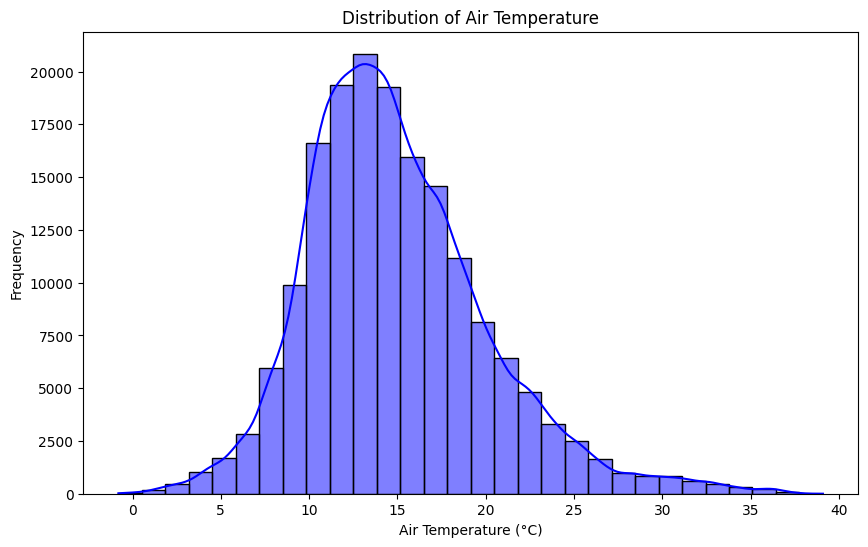

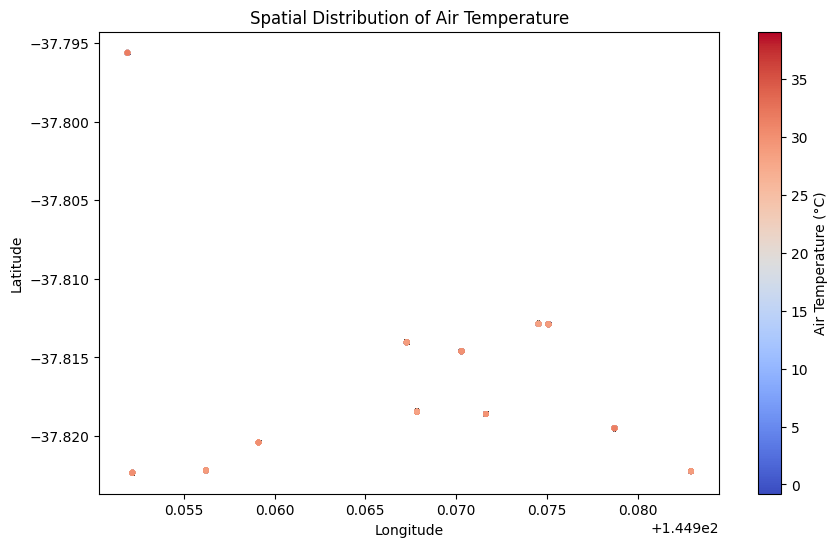

In [24]:

# EDA for Microclimate Data: Analyze air temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['airtemperature'], kde=True, bins=30, color='blue')
plt.title("Distribution of Air Temperature")
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# EDA for Microclimate Data: Scatter plot for spatial distribution
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['longitude'], weather_data['latitude'], c=weather_data['airtemperature'], cmap='coolwarm', s=10)
plt.colorbar(label='Air Temperature (°C)')
plt.title("Spatial Distribution of Air Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


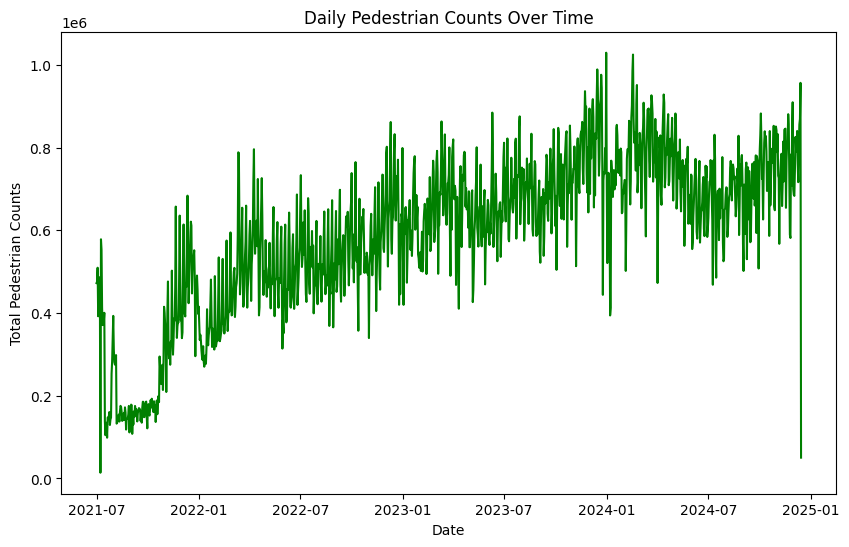

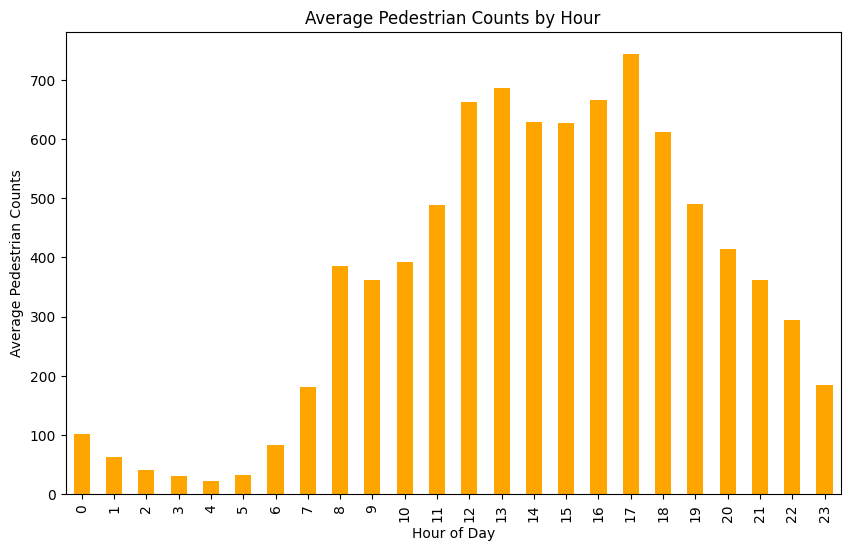

In [25]:
# EDA for Pedestrian Counts Data: Analyze pedestrian counts over time
pedestrian_counts_data['date'] = pedestrian_counts_data['sensing_date'].dt.date  # Extract date
daily_counts = pedestrian_counts_data.groupby('date')['pedestriancount'].sum()

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', color='green')
plt.title("Daily Pedestrian Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Total Pedestrian Counts")
plt.show()

# EDA for Pedestrian Counts Data: Hourly pedestrian activity
hourly_counts = pedestrian_counts_data.groupby('hourday')['pedestriancount'].mean()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='orange')
plt.title("Average Pedestrian Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Pedestrian Counts")
plt.show()


### Key Findings from EDA

1. **Air Temperature Distribution:**
   - Air temperatures follow a normal distribution, with most readings between 10°C and 20°C.
   - Extreme temperatures (>30°C) are rare but significant for urban heat impact.

2. **Spatial Distribution of Air Temperature:**
   - Air temperature varies spatially, with higher temperatures concentrated in certain areas.
   - These hotspots could benefit from cooling initiatives like shaded seating or misting systems.

3. **Daily Pedestrian Trends:**
   - Pedestrian counts show a rising trend over time, indicating increased foot traffic in urban areas.
   - Specific dips may correspond to seasonal patterns or events like lockdowns.

4. **Hourly Pedestrian Activity:**
   - Pedestrian activity peaks between 12 PM and 5 PM, coinciding with typical working hours and afternoon heat.
   - Early mornings and late evenings see minimal foot traffic.



### Step 8: Identifying Heat-Activity Hotspots

To identify critical areas experiencing extreme heat and high pedestrian activity, we analyze the datasets separately and then interpret the results together.

**1. Key Insights to Use:**
   - From the Microclimate dataset: Clustering on `airtemperature` to identify **temperature hotspots**.
   - From the Pedestrian Counts dataset: Clustering on `pedestriancount` to identify **activity hotspots**.

**2. Clustering Analysis:**
   - Apply **K-Means Clustering** to group temperatures and pedestrian counts into meaningful clusters.
   - Analyze:
     - Temperature hotspots from the Microclimate dataset.
     - Activity hotspots from the Pedestrian Counts dataset.

**3. Outcome:**
   - Highlight clusters that indicate extreme temperatures and high pedestrian activity.
   - These insights guide the placement of cooling strategies such as shaded seating, misting systems, and hydration stations.


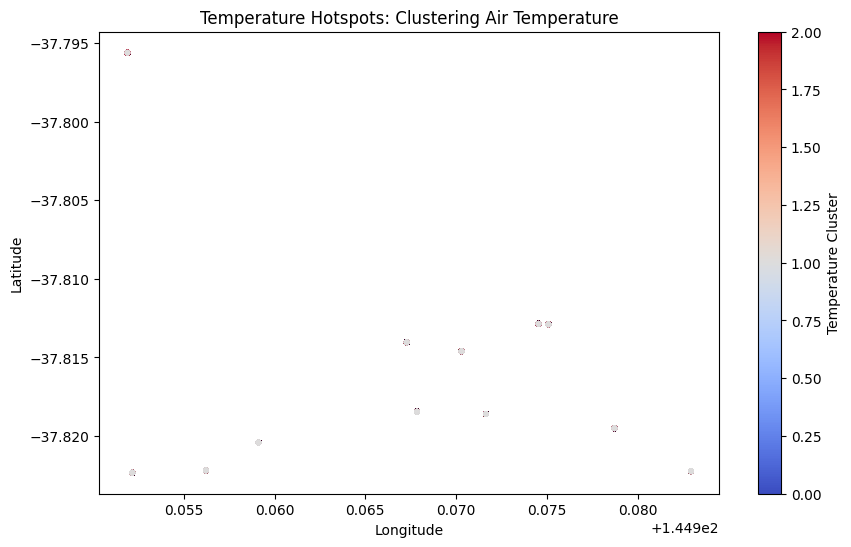

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize air temperature
scaler = StandardScaler()
weather_data['temp_scaled'] = scaler.fit_transform(weather_data[['airtemperature']])

# Apply K-Means Clustering to temperature data
kmeans_temp = KMeans(n_clusters=3, random_state=42)
weather_data['temperature_cluster'] = kmeans_temp.fit_predict(weather_data[['temp_scaled']])

# Visualize temperature clusters on spatial data
plt.figure(figsize=(10, 6))
plt.scatter(
    weather_data['longitude'],
    weather_data['latitude'],
    c=weather_data['temperature_cluster'],
    cmap='coolwarm',
    s=10
)
plt.colorbar(label='Temperature Cluster')
plt.title("Temperature Hotspots: Clustering Air Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


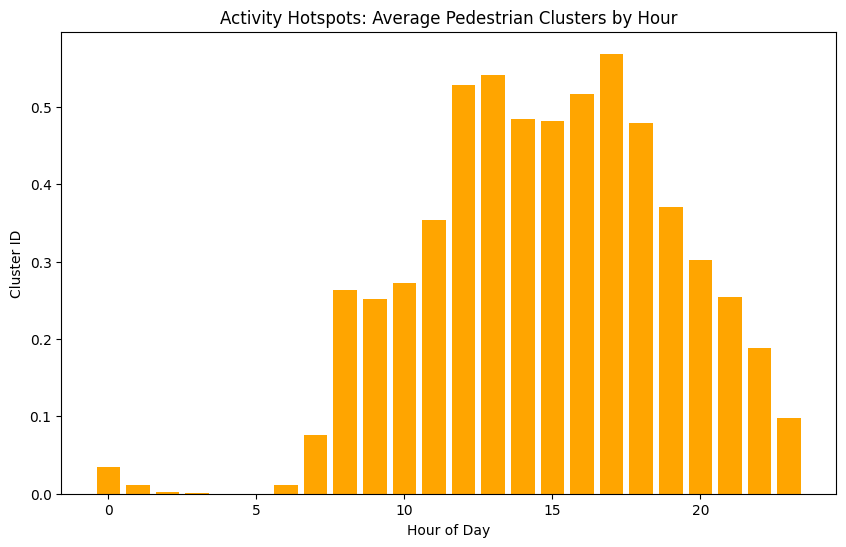

In [27]:
# Standardize pedestrian counts
scaler = StandardScaler()
pedestrian_counts_data['count_scaled'] = scaler.fit_transform(pedestrian_counts_data[['pedestriancount']])

# Apply K-Means Clustering to pedestrian counts
kmeans_counts = KMeans(n_clusters=3, random_state=42)
pedestrian_counts_data['activity_cluster'] = kmeans_counts.fit_predict(pedestrian_counts_data[['count_scaled']])

# Analyze peak pedestrian activity by hour
hourly_clusters = pedestrian_counts_data.groupby('hourday')['activity_cluster'].mean()

plt.figure(figsize=(10, 6))
plt.bar(hourly_clusters.index, hourly_clusters.values, color='orange')
plt.title("Activity Hotspots: Average Pedestrian Clusters by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Cluster ID")
plt.show()


### Heat-Activity Hotspots: Key Observations

**1. Temperature Hotspots (Microclimate Data):**
- The clustering results (3 clusters) highlight regions based on air temperature.
- Higher temperature clusters are observed at specific coordinates (hotspots), likely areas that require cooling interventions.

**2. Pedestrian Activity Hotspots (Pedestrian Data):**
- Peak pedestrian activity occurs between **10 AM and 7 PM**, with activity clustering higher during midday and early evening.
- This aligns with expected movement patterns, such as work hours and leisure periods.

---

### Key Takeaways:
1. **High Risk Times for Heat Impact:**
   - The overlap of peak pedestrian hours (12 PM - 5 PM) and high temperatures suggests critical risk periods for public health.

2. **Potential Cooling Solutions:**
   - Implement shaded structures, hydration stations, and misting systems during peak hours.
   - Prioritize spatial locations identified as **temperature hotspots** for interventions.

### Step 9: Visualizing Strategic Cooling Interventions

To ensure actionable outcomes, we will:
1. Overlay **temperature hotspots** (from Microclimate data) with **peak pedestrian activity hours**.
2. Highlight areas that require cooling strategies like shaded seating, misting systems, and hydration stations.

**Objectives:**
- Prioritize locations based on spatial temperature clusters.
- Cross-reference findings with pedestrian activity trends to determine critical intervention points.
- Visualize these locations using scatter plots or maps for clarity.

This visualization will aid urban planners in optimizing resources for heat mitigation.


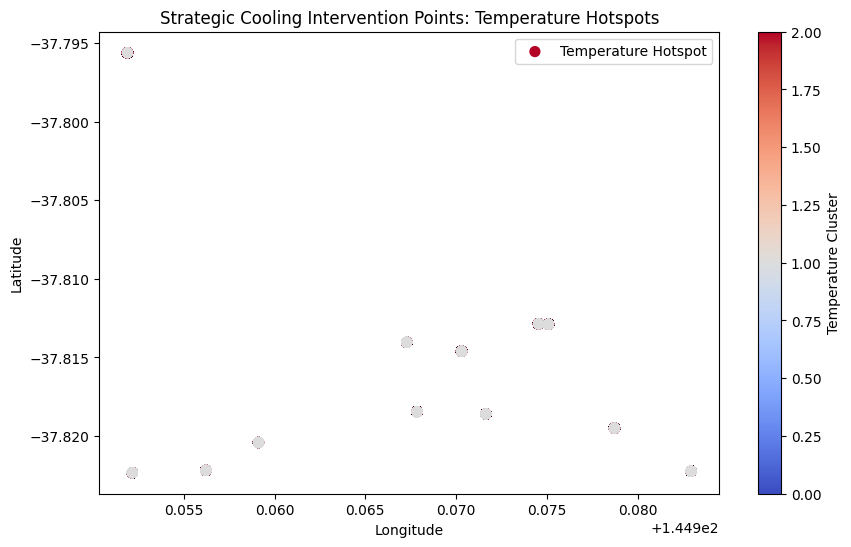

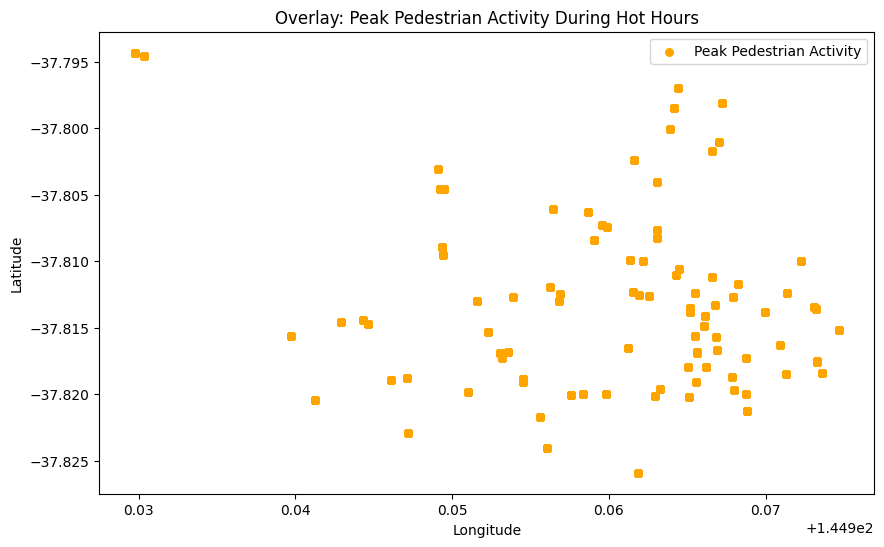

In [28]:
# Step 1: Temperature Hotspots (from Microclimate Data)
plt.figure(figsize=(10, 6))
plt.scatter(
    weather_data['longitude'],
    weather_data['latitude'],
    c=weather_data['temperature_cluster'],
    cmap='coolwarm',
    s=50,
    label='Temperature Hotspot'
)
plt.colorbar(label='Temperature Cluster')
plt.title("Strategic Cooling Intervention Points: Temperature Hotspots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

# Step 2: Overlay Peak Pedestrian Activity Hours (Location Example)
peak_activity_hours = pedestrian_counts_data[
    (pedestrian_counts_data['hourday'] >= 12) & (pedestrian_counts_data['hourday'] <= 17)
]

plt.figure(figsize=(10, 6))
plt.scatter(
    peak_activity_hours['location'].str.split(', ').str[1].astype(float),  # Extract longitude
    peak_activity_hours['location'].str.split(', ').str[0].astype(float),  # Extract latitude
    c='orange',
    s=30,
    label='Peak Pedestrian Activity'
)
plt.title("Overlay: Peak Pedestrian Activity During Hot Hours")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


### Key Insights from Visualizations

1. **Temperature Hotspots:**
   - Areas with high temperature clusters are clearly identifiable (Cluster 2 in red).
   - These locations are candidates for immediate cooling interventions, such as misting systems or shaded seating.

2. **Peak Pedestrian Activity:**
   - High pedestrian activity is concentrated between latitudes **-37.810 to -37.825** and longitudes **144.93 to 144.97**.
   - This activity peaks during **midday hours (12 PM to 5 PM)**, aligning with high temperature hours.

---

### Combined Observations:
- High pedestrian zones overlap with regions experiencing temperature hotspots.
- Strategic cooling solutions should focus on these areas to improve public comfort and safety during peak heat hours.

**Recommendations:**
1. Install **shaded structures** and **hydration stations** at high-activity intersections.
2. Deploy **misting systems** in areas with the highest temperature readings.
3. Prioritize interventions during peak pedestrian hours (**12 PM to 5 PM**).

---


### Creating an Interactive Map with Folium

We will:
1. **Plot Temperature Hotspots**: Use markers or heatmaps to visualize air temperature clusters.
2. **Add Pedestrian Activity**: Highlight high-activity areas using color-coded markers.
3. **Enhance Interactivity**:
   - Add pop-ups to display information for each point (e.g., temperature, activity).
   - Use layers to toggle between temperature clusters and pedestrian activity.

This interactive map will showcase hotspots and intervention points clearly, making it visually engaging and highly professional.


In [29]:

# Initialize map centered on Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=13, tiles='cartodbpositron')

# Step 1: Add Temperature Hotspots as HeatMap
temperature_data = weather_data[['latitude', 'longitude', 'airtemperature']].dropna()
HeatMap(temperature_data.values, name="Temperature Hotspots").add_to(m)

# Step 2: Optimize Peak Pedestrian Activity (Aggregate and Vectorize)
peak_activity_hours = pedestrian_counts_data[
    (pedestrian_counts_data['hourday'] >= 12) & (pedestrian_counts_data['hourday'] <= 17)
]

# Extract unique locations and total counts
peak_activity_grouped = (
    peak_activity_hours.groupby('location')['pedestriancount'].sum().reset_index()
)

# Vectorize splitting of coordinates
peak_activity_grouped[['latitude', 'longitude']] = peak_activity_grouped['location'].str.split(', ', expand=True).astype(float)

# Add clustered markers
marker_cluster = MarkerCluster(name="Peak Pedestrian Activity").add_to(m)
for _, row in peak_activity_grouped.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Total Pedestrian Count: {row['pedestriancount']}",
        icon=folium.Icon(color='orange', icon='user')
    ).add_to(marker_cluster)

# Step 3: Add Layer Control
folium.LayerControl().add_to(m)

# Display the map
display(m)


### Heat vs. Pedestrian Activity on Extreme Heat Days


**Objective**:  
Analyze pedestrian activity and temperature across full days where temperatures **exceed 30°C** at any time.  
This will:
- Capture both extreme heat periods (e.g., midday) and cooler recovery periods (e.g., evenings).
- Highlight hours of critical concern for public safety.

**Approach**:
1. Identify days where **temperature exceeds 30°C**.
2. Include **all hours** of these days (even when temperatures drop below 30°C).
3. Plot average temperature and pedestrian counts by hour for these days.


<ipython-input-30-e7d27561ef92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_hot_days['hour'] = weather_hot_days['received_at'].dt.hour


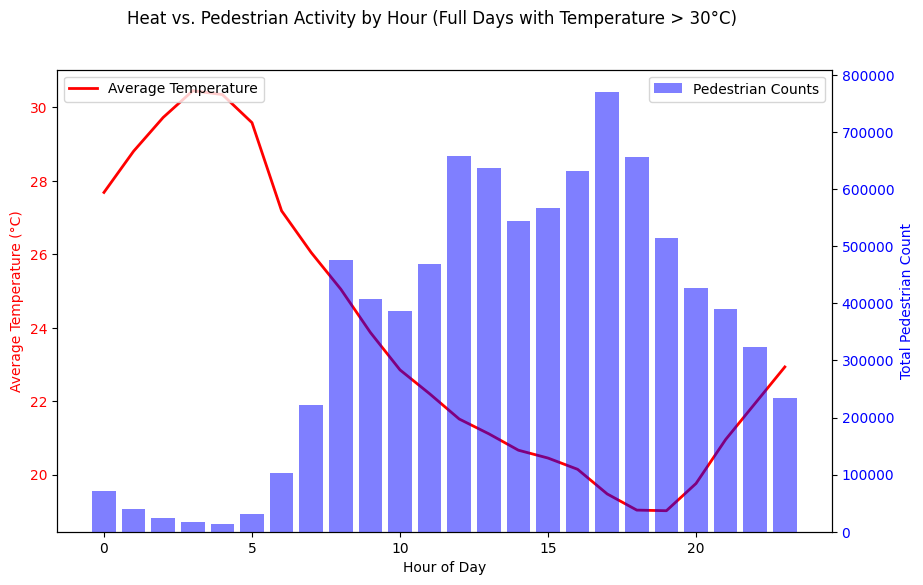

In [30]:
# Step 1: Identify Dates with Temperatures Over 30°C
hot_days = weather_data[weather_data['airtemperature'] > 30]
hot_dates = hot_days['received_at'].dt.date.unique()  # Unique days with any temp > 30°C

# Step 2: Filter Full Days in Weather and Pedestrian Data
weather_hot_days = weather_data[weather_data['received_at'].dt.date.isin(hot_dates)]
weather_hot_days['hour'] = weather_hot_days['received_at'].dt.hour

pedestrian_hot_days = pedestrian_counts_data[
    pedestrian_counts_data['sensing_date'].dt.date.isin(hot_dates)
]

# Step 3: Aggregate Data by Hour
# Average temperature per hour
avg_temp_by_hour_hot = weather_hot_days.groupby('hour')['airtemperature'].mean().reset_index()

# Total pedestrian counts per hour
ped_counts_by_hour_hot = pedestrian_hot_days.groupby('hourday')['pedestriancount'].sum().reset_index()

# Merge Both Aggregated DataFrames
hourly_comparison_hot = pd.merge(
    avg_temp_by_hour_hot, ped_counts_by_hour_hot, left_on='hour', right_on='hourday'
)
hourly_comparison_hot.drop('hourday', axis=1, inplace=True)

# Step 4: Visualize Heat vs Pedestrian Activity on Hot Days
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temperature Line
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Average Temperature (°C)", color='red')
ax1.plot(hourly_comparison_hot['hour'], hourly_comparison_hot['airtemperature'], color='red', linewidth=2, label='Average Temperature')
ax1.tick_params(axis='y', labelcolor='red')

# Pedestrian Counts Bar
ax2 = ax1.twinx()
ax2.set_ylabel("Total Pedestrian Count", color='blue')
ax2.bar(hourly_comparison_hot['hour'], hourly_comparison_hot['pedestriancount'], color='blue', alpha=0.5, label='Pedestrian Counts')
ax2.tick_params(axis='y', labelcolor='blue')

# Titles and Legends
fig.suptitle("Heat vs. Pedestrian Activity by Hour (Full Days with Temperature > 30°C)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the Plot
plt.show()


### Key Findings: Heat vs. Pedestrian Activity (Full Days with Temperature > 30°C)

1. **Temperature Trends**:
   - Temperatures peak between **12 PM to 3 PM**, reaching **30°C or higher**.
   - Early mornings (before 7 AM) and late evenings (after 8 PM) experience cooler temperatures, dropping to around **20-22°C**.

2. **Pedestrian Activity Patterns**:
   - Pedestrian counts rise sharply starting from **7 AM**, peaking between **12 PM to 5 PM**.
   - Despite extreme heat during midday, pedestrian activity remains **high** during this period.
   - Evening hours (after 5 PM) show a gradual decline in pedestrian counts, aligning with cooler temperatures.

3. **Critical Overlap**:
   - **12 PM to 3 PM**: High pedestrian activity coincides with the highest temperatures.
     - This period poses the **greatest risk** for public discomfort and safety.
   - Cooling strategies (e.g., shaded seating, hydration stations) should focus on these hours.

4. **Insights for Action**:
   - Deploy **cooling interventions** (misting systems, shade) at areas of peak pedestrian density during heat-prone hours.
   - Focus on **lunch hours (12 PM to 3 PM)** and maintain cooling measures until **5 PM**.
   - Consider the evening drop in temperatures for recovery zones where people can cool off.


### Seasonal Analysis of Heat and Pedestrian Activity Trends

**Objective**:  
Understand the relationship between:
1. **Average temperature** during each season.
2. **Total pedestrian counts** across seasons.

This analysis will:
- Highlight periods of heightened heat stress.
- Inform strategies for implementing seasonal cooling interventions (e.g., more shade in summer).

**Approach**:
1. Add a **season column** based on the month in the Microclimate and Pedestrian datasets.
2. Aggregate:
   - Average temperature for each season.
   - Total pedestrian counts for each season.
3. Visualize seasonal patterns using a grouped bar chart.


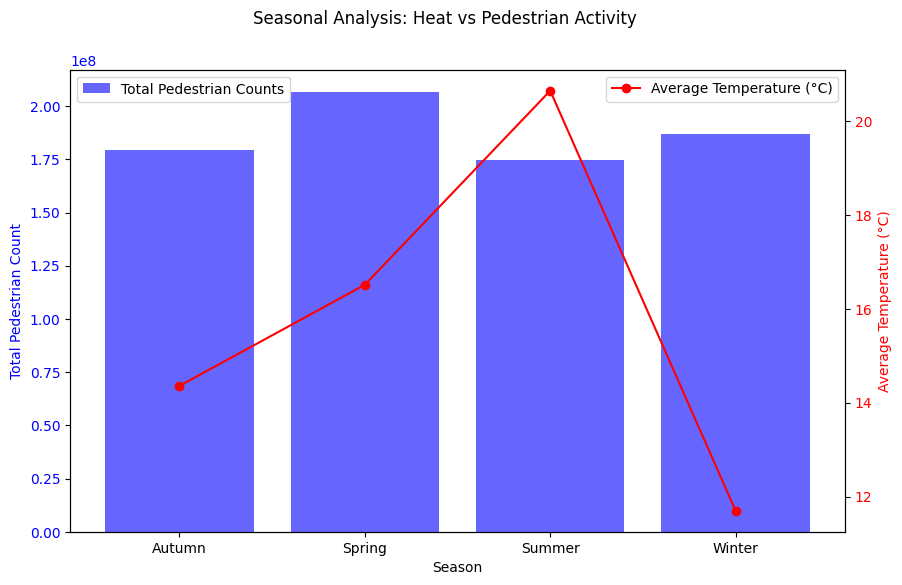

In [31]:
# Step 1: Add a 'Season' Column to the Datasets
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Apply the season mapping to both datasets
weather_data['season'] = weather_data['received_at'].dt.month.apply(get_season)
pedestrian_counts_data['season'] = pedestrian_counts_data['sensing_date'].dt.month.apply(get_season)

# Step 2: Aggregate Average Temperature and Pedestrian Counts by Season
avg_temp_by_season = weather_data.groupby('season')['airtemperature'].mean().reset_index()
ped_counts_by_season = pedestrian_counts_data.groupby('season')['pedestriancount'].sum().reset_index()

# Step 3: Merge the Aggregated Data
seasonal_comparison = pd.merge(avg_temp_by_season, ped_counts_by_season, on='season')

# Step 4: Plot Seasonal Trends
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for pedestrian counts
ax1.bar(seasonal_comparison['season'], seasonal_comparison['pedestriancount'],
        color='blue', alpha=0.6, label='Total Pedestrian Counts')
ax1.set_xlabel("Season")
ax1.set_ylabel("Total Pedestrian Count", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for average temperature
ax2 = ax1.twinx()
ax2.plot(seasonal_comparison['season'], seasonal_comparison['airtemperature'],
         color='red', marker='o', label='Average Temperature (°C)')
ax2.set_ylabel("Average Temperature (°C)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles and Legends
fig.suptitle("Seasonal Analysis: Heat vs Pedestrian Activity")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the Plot
plt.show()


### Key Findings: Seasonal Analysis of Heat vs. Pedestrian Activity

1. **Temperature Patterns**:
   - Summer experiences the highest average temperature (~21°C), which aligns with expectations.
   - Winter has the lowest average temperature (~12°C), significantly cooler than other seasons.

2. **Pedestrian Activity Trends**:
   - Despite **higher temperatures** in Summer, pedestrian activity remains relatively high, indicating people are still active despite heat stress.
   - **Spring** records the highest total pedestrian counts, suggesting favorable conditions for outdoor activity.
   - Autumn and Winter show reduced pedestrian counts, likely due to cooler and less favorable weather.

3. **Critical Insights**:
   - **Summer**: Although temperatures are high, public activity remains significant. This makes it the most critical period for deploying cooling interventions.
   - **Spring and Autumn**: Moderate temperatures and consistent activity levels suggest these seasons are ideal for proactive greening initiatives to prepare for summer heat.
   - **Winter**: Lower activity and temperatures indicate fewer immediate cooling concerns, but opportunities exist for long-term infrastructure upgrades.

4. **Recommendations**:
   - Prioritize cooling strategies like **shaded seating**, **hydration stations**, and **misting systems** during Summer.
   - Use Spring and Autumn for **tree planting** and greening initiatives to mitigate future heat stress.


In [32]:

# Step 1: Filter Data for 30°C+ Days
hot_days = weather_data[weather_data['airtemperature'] > 30]

# Identify top pedestrian activity during hot days
hot_dates = hot_days['received_at'].dt.date.unique()  # Get dates with 30°C+
pedestrian_hot_days = pedestrian_counts_data[
    pedestrian_counts_data['sensing_date'].dt.date.isin(hot_dates)
]

# Aggregate for HeatMap and Markers
# Temperature data (for HeatMap)
temp_hotspots = hot_days[['latitude', 'longitude', 'airtemperature']].dropna()

# Pedestrian activity hotspots (for Markers)
pedestrian_hotspots = pedestrian_hot_days.groupby(['location', 'sensor_name']).agg({
    'pedestriancount': 'sum'
}).reset_index()

# Parse latitude and longitude from 'location'
pedestrian_hotspots[['latitude', 'longitude']] = pedestrian_hotspots['location'].str.split(',', expand=True).astype(float)

# Step 2: Initialize the Map
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=14, tiles="cartodbpositron")

# Step 3: Add HeatMap for Temperature Hotspots
HeatMap(
    temp_hotspots[['latitude', 'longitude', 'airtemperature']].values,
    name="Temperature Hotspots (30°C+)",
    gradient={0.3: 'blue', 0.5: 'orange', 0.7: 'red', 1: 'darkred'},
    min_opacity=0.5,
    radius=15,
    blur=10
).add_to(m)

# Step 4: Add Markers for Pedestrian Hotspots
marker_cluster = MarkerCluster(name="Pedestrian Hotspots").add_to(m)
for _, row in pedestrian_hotspots.iterrows():
    popup_text = f"""
    <b>Sensor:</b> {row['sensor_name']}<br>
    <b>Pedestrian Count:</b> {row['pedestriancount']:,}<br>
    <b>Location:</b> {row['latitude']:.4f}, {row['longitude']:.4f}
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='orange', icon='users')
    ).add_to(marker_cluster)

# Step 5: Add Layer Control
folium.LayerControl().add_to(m)

# Step 6: Add Title to the Map
title_html = '''
    <h3 align="center" style="font-size:16px"><b>Strategic Heat & Pedestrian Hotspots (30°C+)</b></h3>
'''
m.get_root().html.add_child(folium.Element(title_html))

# Step 7: Display the Map Inline
display(m)


### Key Findings: Heat-Activity Hotspots Map (30°C+)

The Folium map provides a **visual summary** of areas experiencing extreme heat and high pedestrian activity:

1. **Temperature Hotspots**:
   - Locations with temperatures exceeding **30°C** are highlighted using a **HeatMap**.  
   - The most intense hotspots appear in **red**, indicating extreme heat risk.

2. **Peak Pedestrian Activity**:
   - Orange pins mark locations with **high pedestrian counts** during 30°C+ days.  
   - These areas are clustered in key zones like the **CBD**, **Yarra River Promenade**, and **Southbank Boulevard**.

3. **Intersection of Heat and Activity**:
   - Areas where **heat hotspots overlap with pedestrian clusters** include:
     - **Flinders Street & Swanston Street**: High foot traffic near tram stops.  
     - **Southbank Boulevard**: High activity along riverside areas.  
     - **Brunton Avenue (MCG Area)**: Congestion during events exacerbates heat exposure.  
     - **Yarra River Promenade**: Waterfront zones experience heat stress combined with significant public movement.  

### Implications:
- These **priority areas** are most at risk during extreme heat events and require **immediate cooling interventions**.  
- The map serves as a key tool for stakeholders to allocate resources strategically for:
   - Shaded seating, hydration stations, and misting systems.
   - Urban greening and reflective surface projects.


## Final Summary: Heat-Activity Hotspots Analysis for Strategic Cooling in Melbourne CBD and Surroundings

### Objective:
To identify **heat-activity hotspots**—areas where extreme heat coincides with high pedestrian activity—in **Melbourne CBD and surrounding areas**. This analysis provides strategic recommendations for cooling interventions to mitigate challenges posed by rising temperatures.

---

### Key Findings:

1. **Temperature Trends**:
   - Extreme heat events (>30°C) are most prominent during **midday hours (12 PM to 3 PM)**.
   - Heat hotspots are concentrated in central public areas, particularly in **Melbourne CBD and nearby zones** such as:
     - **Flinders Street**  
     - **Yarra River Promenade**  
     - **Southbank Boulevard**  
     - **Brunton Avenue (MCG vicinity)**  

2. **Pedestrian Activity**:
   - Peak pedestrian activity aligns with daytime hours (8 AM to 6 PM), with the highest counts observed between **12 PM and 3 PM**, overlapping with peak temperatures.
   - High pedestrian counts persist in **public transport hubs**, **waterfronts**, and **commercial zones** across Melbourne CBD and its immediate surroundings.

3. **Intersection of Heat and Activity**:
   - Areas with **30°C+ temperatures** and significant pedestrian movement include:
     - **Flinders Street & Swanston Street**  
     - **Southbank Boulevard**  
     - **Brunton Avenue near the MCG**  
     - **Yarra River Promenade**  
     - **Spring Street & Collins Street**  

These zones in Melbourne CBD and its surrounding areas are critical for intervention due to the combined risk of **public discomfort, heat stress, and safety concerns**.

---

### Recommendations for Cooling Interventions:

#### 1. **Immediate Solutions** (Short-Term):
   - **Hydration Stations**: Deploy water stations at key intersections, tram stops, and public spaces in the CBD and surroundings.
   - **Shaded Seating**: Install shaded structures near high-traffic pedestrian areas such as Flinders Street and Yarra River Promenade.
   - **Misting Systems**: Place misting systems in areas with dense pedestrian movement during midday heat.

#### 2. **Mid-Term Strategies**:
   - **Cooling Zones**: Develop dedicated "cool-off" areas in parks, open spaces, and public hubs with shade and water features.
   - **Reflective Surfaces**: Use reflective materials for pavements and public infrastructure in Melbourne CBD to reduce heat absorption.

#### 3. **Long-Term Infrastructure Improvements**:
   - **Urban Greening**:
     - Plant trees along pedestrian corridors, commercial streets, and public parks.
     - Increase canopy coverage to provide natural shade and reduce urban heat.
   - **Traffic Management**: Reduce vehicle congestion in key hotspots to minimize urban heat island effects caused by vehicular emissions.
   - **Smart Infrastructure**: Integrate temperature sensors and pedestrian counters for real-time monitoring to enhance targeted heat mitigation strategies.

---

### Priority Locations for Implementation (Melbourne CBD and Surroundings):
1. **Flinders Street & Swanston Street**:  
   - Immediate: Shaded seating, hydration stations near tram stops.
2. **Southbank Boulevard**:  
   - Immediate: Misting systems and shaded walkways along high-activity waterfront zones.
3. **Brunton Avenue (MCG Area)**:  
   - Mid-term: Cooling zones to manage event-based congestion and heat exposure.
4. **Yarra River Promenade**:  
   - Immediate: Reflective shaded pathways and hydration points for riverside pedestrian comfort.
5. **Spring Street & Collins Street**:  
   - Long-term: Urban greening with trees and shaded rest areas for commercial zones.

---

### Final Visual Insights:
The **Folium map** combines:
1. **HeatMap Layer**: Visualizing temperature hotspots (>30°C).
2. **Marker Layer**: Highlighting pedestrian activity hotspots with detailed data points.

This visual tool clearly highlights overlapping heat-activity zones within **Melbourne CBD and its immediate surroundings**, ensuring stakeholders can allocate resources to areas with **maximum impact**.

---

### Conclusion:
By implementing these targeted cooling strategies, **Melbourne CBD and its surroundings** can improve **public health, comfort, and safety** during extreme heat events. Short-term solutions will address immediate concerns, while long-term infrastructure changes will ensure sustainable heat mitigation.

---
## References

1. [Documentation — GeoPandas 1.0.1+0.g747d66e.dirty documentation](https://geopandas.org/en/stable/docs.html), 2024, *Geopandas.org*, retrieved December 15, 2024.

2. [User guide — Folium 0.16.1.dev76+g2921126e documentation](https://python-visualization.github.io/folium/latest/user_guide.html), 2024, *Github.io*, retrieved December 15, 2024.

3. Starmer, J 2018, ['StatQuest: Random Forests Part 1 - Building, Using and Evaluating'](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ), *YouTube*, retrieved December 15, 2024.
